In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("processed_data.csv")

data.head()

,title,text,subject,date,class,date_ofmonth,month,year,day_of_week,year_month,...,text_word_count,title_word_count,text_sentence_count,title_sentence_count,text_average_word_length,title_average_word_length,text_punctuation_count,title_punctuation_count,text_stopwords_count,title_stopwords_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,31,12,2017,Sunday,2017-12,...,516,13,28,1,4.804040,5.583333,121,1,186,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,31,12,2017,Sunday,2017-12,...,309,9,11,1,5.213115,7.625000,39,0,119,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,30,12,2017,Saturday,2017-12,...,600,16,25,1,5.168966,5.000000,148,0,209,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,29,12,2017,Friday,2017-12,...,475,15,15,1,5.180180,4.571429,118,2,160,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,25,12,2017,Monday,2017-12,...,434,12,19,1,4.554762,5.363636,40,0,195,0


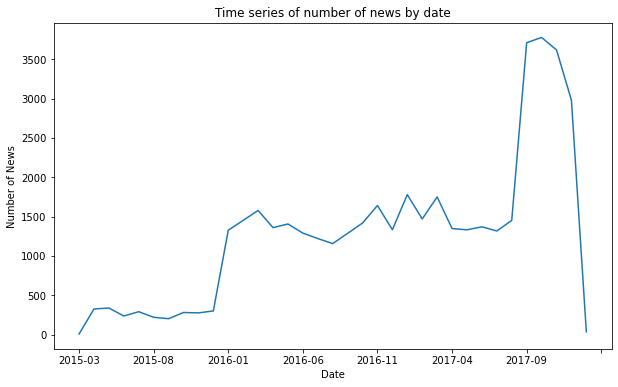

In [2]:
import matplotlib.pyplot as plt

# Group the DataFrame by date and count the number of news on each date
plt_by_date = data.groupby('year_month').size()

# Plot the time series of the number of news by date
plt_by_date.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of News')
plt.title('Time series of number of news by date')
plt.show()

### Text Based Feature EDA

<AxesSubplot:xlabel='text_word_count', ylabel='Count'>

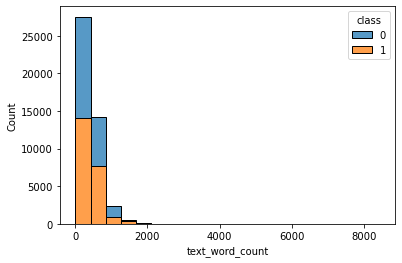

In [59]:
# Plot the Text Word Count
sns.histplot(data=data, x='text_word_count', hue='class', bins=20, multiple="stack", kde=False)

<AxesSubplot:xlabel='title_word_count', ylabel='Count'>

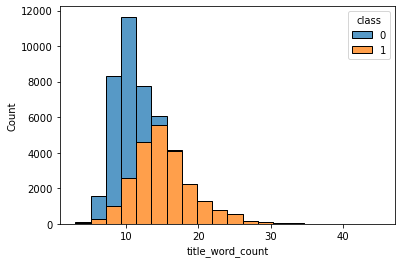

In [61]:
# Plot the Title Word count
sns.histplot(data=data, x='title_word_count', hue='class', bins=20, multiple="stack", kde=False)

<AxesSubplot:xlabel='text_sentence_count', ylabel='Count'>

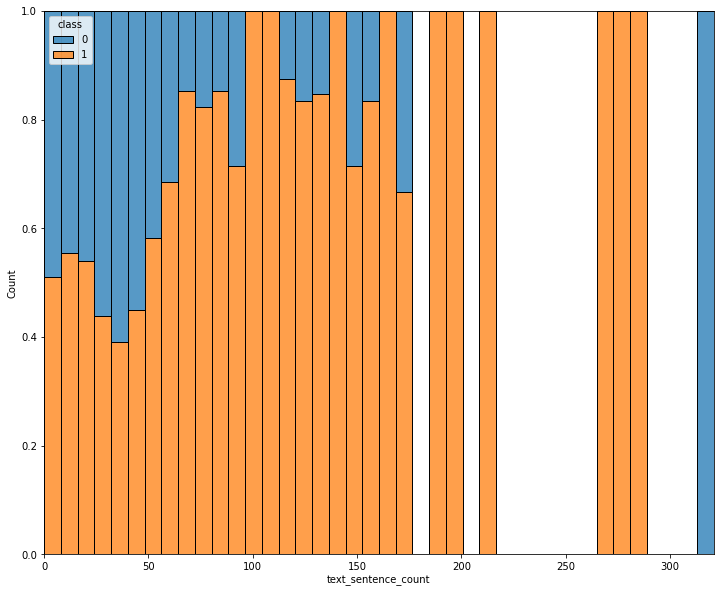

In [53]:
# Plot the Text Sentence count
plt.figure(figsize=(12,10))
#plt.xlim(0,400)
sns.histplot(data=data, x='text_sentence_count', hue='class', bins=40,  multiple="fill", kde=False)



<AxesSubplot:xlabel='title_sentence_count', ylabel='Count'>

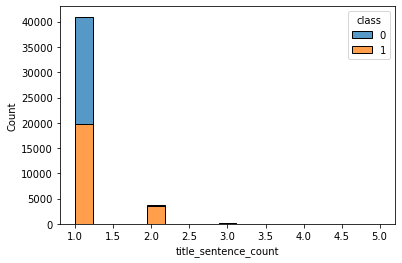

In [62]:
# Plot the Title Sentence count
sns.histplot(data=data, x='title_sentence_count', hue='class', multiple="stack", kde=False)

### NER EDA

<Axes: >

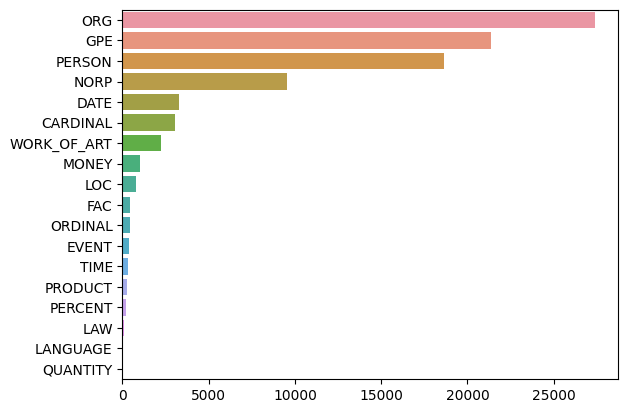

In [26]:
#Here we perform NER analysis to see if there are any interesting traits found in the article samples.
import spacy
import collections

nlp = spacy.load("en_core_web_sm")

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

#we can see which entities are the most common among titles in the dataset for both real and fake news.
ent=data['title'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=collections.Counter(ent)
count=counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

<Axes: >

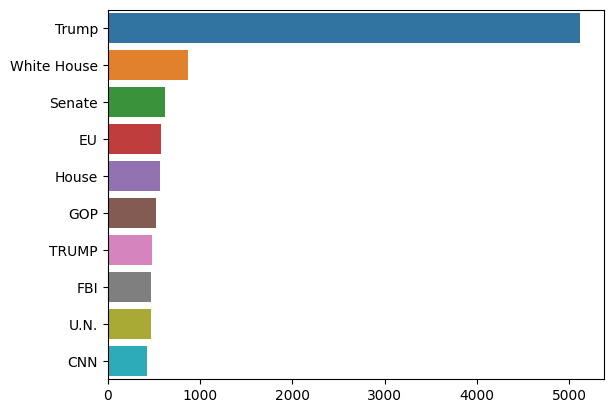

In [28]:
#we can also visualize the some of the most common companies, institutions that shows up in these article titles. 
#It seems that some of the words are the same but the only difference was the capitalization. Despite that, there might be value in retaining the capitalization of words as it may be useful in analyzing
#subjective opinions or bias in the articles.

def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

org = data['title'].apply(lambda x: ner(x))
org = [i for x in org for i in x]
counter = collections.Counter(org)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)

<Axes: >

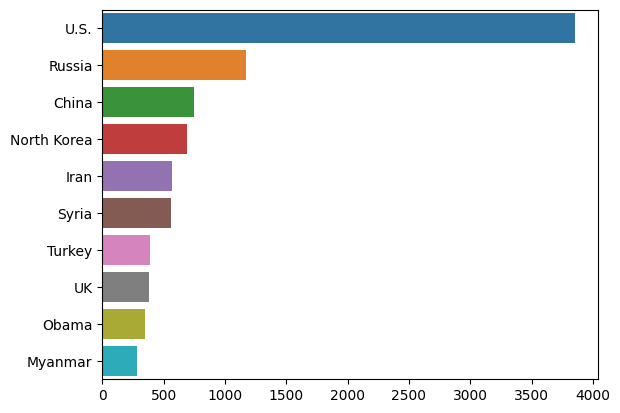

In [29]:
#visualize most common geographic locations based on the article titles.
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe = data['title'].apply(lambda x: ner(x))
gpe = [i for x in gpe for i in x]
counter = collections.Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)

<Axes: >

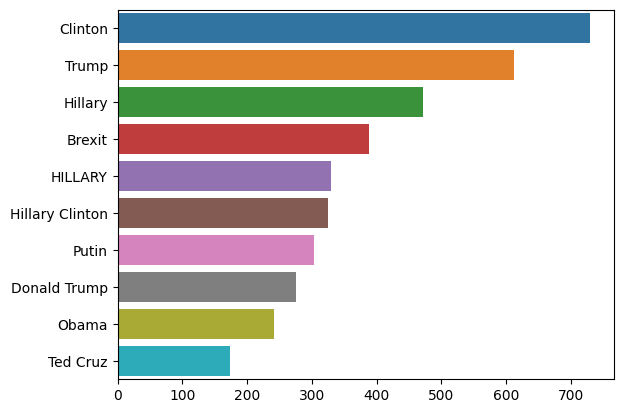

In [30]:
#visualize the most popular person entity based on the article titles. In particular, it seems that Brexit was misclassified as a person in the dataset and this is something we might have to take note of.
def ner(text,ent="PERSON"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

person = data['title'].apply(lambda x: ner(x))
person = [i for x in person for i in x]
counter = collections.Counter(person)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)